<a href="https://colab.research.google.com/github/Hutaf/SpaceApp/blob/main/solar_power_radiation_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solar Power Radiation Predication**
## Based on the All Sky Surface Longwave Downward Irradiance variable



In [3]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

%matplotlib inline

## importing dataset

In [4]:
#data_path = r'drive/My Drive/Proj/S.P.F./solarpowergeneration.csv'
dts = pd.read_csv('/content/User_Lat_24.76399_Lon_46.640249 (1).csv')
dts.head()


,Unnamed: 0,V10M,ALLSKY_SRF_ALB,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,T2MWET,WS10M,PS,ALLSKY_KT,SZA,CLRSKY_SFC_LW_DWN,QV2M,T2M,WD10M,T2MDEW,ALLSKY_SFC_LW_DWN,RH2M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,PRECTOTCORR
0,2033-12-24 04:08:20,-3.16,-999.0,0.0,0.0,10.03,4.55,94.97,-999.0,90.0,277.45,8.06,10.12,46.04,9.94,279.90,98.62,0.0,0.0,0.0
1,2033-12-24 04:08:21,-3.12,-999.0,0.0,0.0,9.79,4.67,94.98,-999.0,90.0,277.20,7.81,10.02,48.12,9.55,288.33,96.62,0.0,0.0,0.0
2,2033-12-24 04:08:22,-2.94,-999.0,0.0,0.0,9.41,4.54,94.95,-999.0,90.0,277.15,7.57,9.74,49.68,9.09,277.83,95.62,0.0,0.0,0.0
3,2033-12-24 04:08:23,-2.45,-999.0,0.0,0.0,8.99,4.11,94.92,-999.0,90.0,281.50,7.39,9.30,53.35,8.69,284.92,95.81,0.0,0.0,0.0
4,2033-12-24 04:08:24,-2.11,-999.0,0.0,0.0,8.65,3.89,94.93,-999.0,90.0,282.08,7.20,9.00,57.20,8.30,285.02,95.19,0.0,0.0,0.0


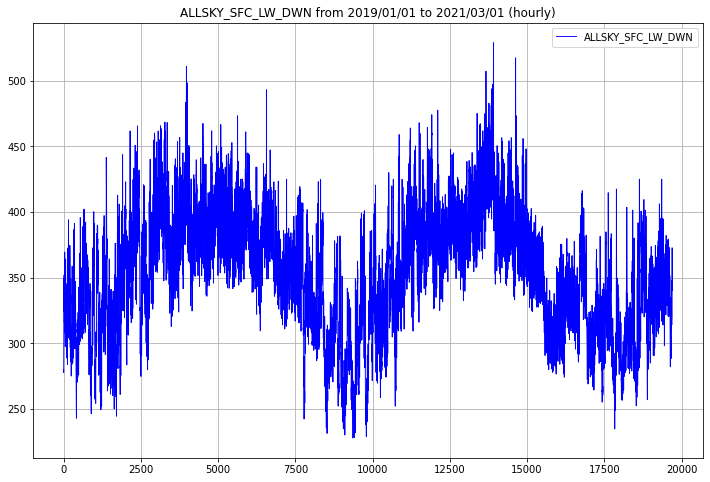

In [6]:
# Visualizing the ALLSKY_SFC_LW_DWN
dts['ALLSKY_SFC_LW_DWN'].plot(label='ALLSKY_SFC_LW_DWN', figsize=(12, 8), title='ALLSKY_SFC_LW_DWN from 2019/01/01 to 2021/03/01 (hourly)', color='blue', linewidth=0.9, grid=True)
plt.legend()

In [10]:
# Dropping some columns

dts = dts.drop(["Unnamed: 0", "ALLSKY_SRF_ALB", "ALLSKY_SFC_PAR_TOT", "T2MWET", "ALLSKY_KT",	"SZA", "CLRSKY_SFC_LW_DWN", 	"QV2M",	 "T2MDEW"], axis = 1)
dts.head()

,V10M,ALLSKY_SFC_UV_INDEX,WS10M,PS,T2M,WD10M,ALLSKY_SFC_LW_DWN,RH2M,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,PRECTOTCORR
0,-3.16,0.0,4.55,94.97,10.12,46.04,279.90,98.62,0.0,0.0,0.0
1,-3.12,0.0,4.67,94.98,10.02,48.12,288.33,96.62,0.0,0.0,0.0
2,-2.94,0.0,4.54,94.95,9.74,49.68,277.83,95.62,0.0,0.0,0.0
3,-2.45,0.0,4.11,94.92,9.30,53.35,284.92,95.81,0.0,0.0,0.0
4,-2.11,0.0,3.89,94.93,9.00,57.20,285.02,95.19,0.0,0.0,0.0


In [12]:
# Dropping the Prediction Row
X = np.array(dts.drop(["ALLSKY_SFC_LW_DWN"], axis = 1))
print(X.shape)

(19674, 10)


In [15]:
# Creating the Prediction Row
y = np.array(dts["ALLSKY_SFC_LW_DWN"])   
# print(y)
print(y.shape)

(19674,)


## Data Splitting into training and test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (14755, 10) (14755,) 
Test Shape: (4919, 10) (4919,)


## Features Scaling (Standard Scler)

In [20]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

In [21]:
X_train

array([[-0.73698689,  0.18055825, -0.28571665, ...,  2.49794941,
         2.14835858, -0.06869497],
       [ 0.84371838,  0.06007324, -0.75502977, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       [ 0.42940999,  0.06007324, -1.27234083, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       ...,
       [-2.16727447,  0.12388791,  2.5408283 , ...,  1.12251693,
         1.25942491, -0.06869497],
       [-0.43879041,  0.06007324, -0.54703873, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       [-0.98768306,  0.06007324,  0.02360337, ..., -0.62648982,
        -0.7370069 , -0.06869497]])

In [22]:
X_test

array([[-0.52059652,  0.06007324, -0.89902357, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       [-0.61559717,  0.06007324, -0.73369736, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       [-0.83198754,  0.06007324, -0.29104975, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       ...,
       [-2.55255489,  0.10487671,  3.18613385, ...,  0.64705878,
         1.04295698, -0.06869497],
       [ 1.97580948,  0.06007324,  1.54887102, ..., -0.62648982,
        -0.7370069 , -0.06869497],
       [-1.25949047,  0.18140589,  0.6475765 , ...,  2.565872  ,
         2.20811001, -0.06869497]])

In [23]:
y_train

array([[ 1.21864006],
       [-1.48635608],
       [-0.83027825],
       ...,
       [ 1.47129384],
       [-1.52464351],
       [-1.41821743]])

# Linear regression

In [24]:
# Defining the Linear Regression Model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)      # Training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Score of the Linear Regression Model (Using the Test Data)

linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: -57.222563533746964


In [27]:
# Define the Real & Prediction Values

X_predict = np.array(dts.drop(["ALLSKY_SFC_LW_DWN"], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(dts.drop(["ALLSKY_SFC_LW_DWN"], 1)))

# Feature Importance

In [65]:
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index=dts.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending=False)

,Feature Importance
T2M,1.09
RH2M,0.31
ALLSKY_SFC_LW_DWN,0.27
V10M,0.08
WS10M,0.04
ALLSKY_SFC_UVA,0.04
ALLSKY_SFC_UV_INDEX,0.02
WD10M,-0.02
PS,-0.06
ALLSKY_SFC_UVB,-0.48


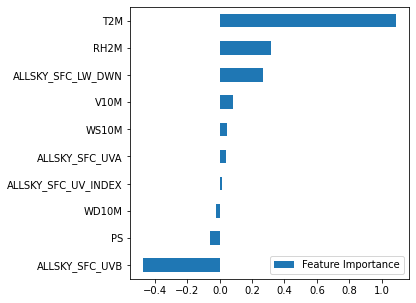

In [67]:
g = lasso_coeff[lasso_coeff['Feature Importance']!=0].sort_values('Feature Importance').plot(kind='barh',figsize=(5,5))

## Creating Neural Network

In [43]:
def create_newnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels)) 
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


In [44]:
clf = create_newnet([32, 64], 'relu', 'normal')
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [45]:
hist = clf.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=100 mb h, verbose=2)

Epoch 1/100
462/462 - 2s - loss: 0.2967 - root_mean_squared_error: 0.5447 - val_loss: 127224.9766 - val_root_mean_squared_error: 356.6861
Epoch 2/100
462/462 - 1s - loss: 0.2053 - root_mean_squared_error: 0.4531 - val_loss: 127219.3906 - val_root_mean_squared_error: 356.6783
Epoch 3/100
462/462 - 1s - loss: 0.1922 - root_mean_squared_error: 0.4384 - val_loss: 127200.5938 - val_root_mean_squared_error: 356.6519
Epoch 4/100
462/462 - 1s - loss: 0.1866 - root_mean_squared_error: 0.4320 - val_loss: 127179.1016 - val_root_mean_squared_error: 356.6218
Epoch 5/100
462/462 - 1s - loss: 0.1811 - root_mean_squared_error: 0.4256 - val_loss: 127215.2656 - val_root_mean_squared_error: 356.6725
Epoch 6/100
462/462 - 1s - loss: 0.1774 - root_mean_squared_error: 0.4212 - val_loss: 127176.8359 - val_root_mean_squared_error: 356.6186
Epoch 7/100
462/462 - 1s - loss: 0.1755 - root_mean_squared_error: 0.4189 - val_loss: 127187.5938 - val_root_mean_squared_error: 356.6337
Epoch 8/100
462/462 - 1s - loss: 0

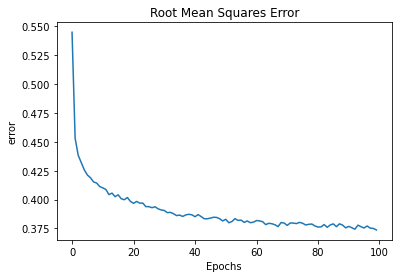

In [46]:
plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [47]:
clf.evaluate(X_train, y_train)

462/462 [==============================] - 1s 1ms/step - loss: 0.2044 - root_mean_squared_error: 0.4522


[0.20444083213806152, 0.4521513283252716]

In [48]:
from sklearn.metrics import mean_squared_error

y_pred = clf.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

356.5183084478506

In [50]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

-244409.8007350342

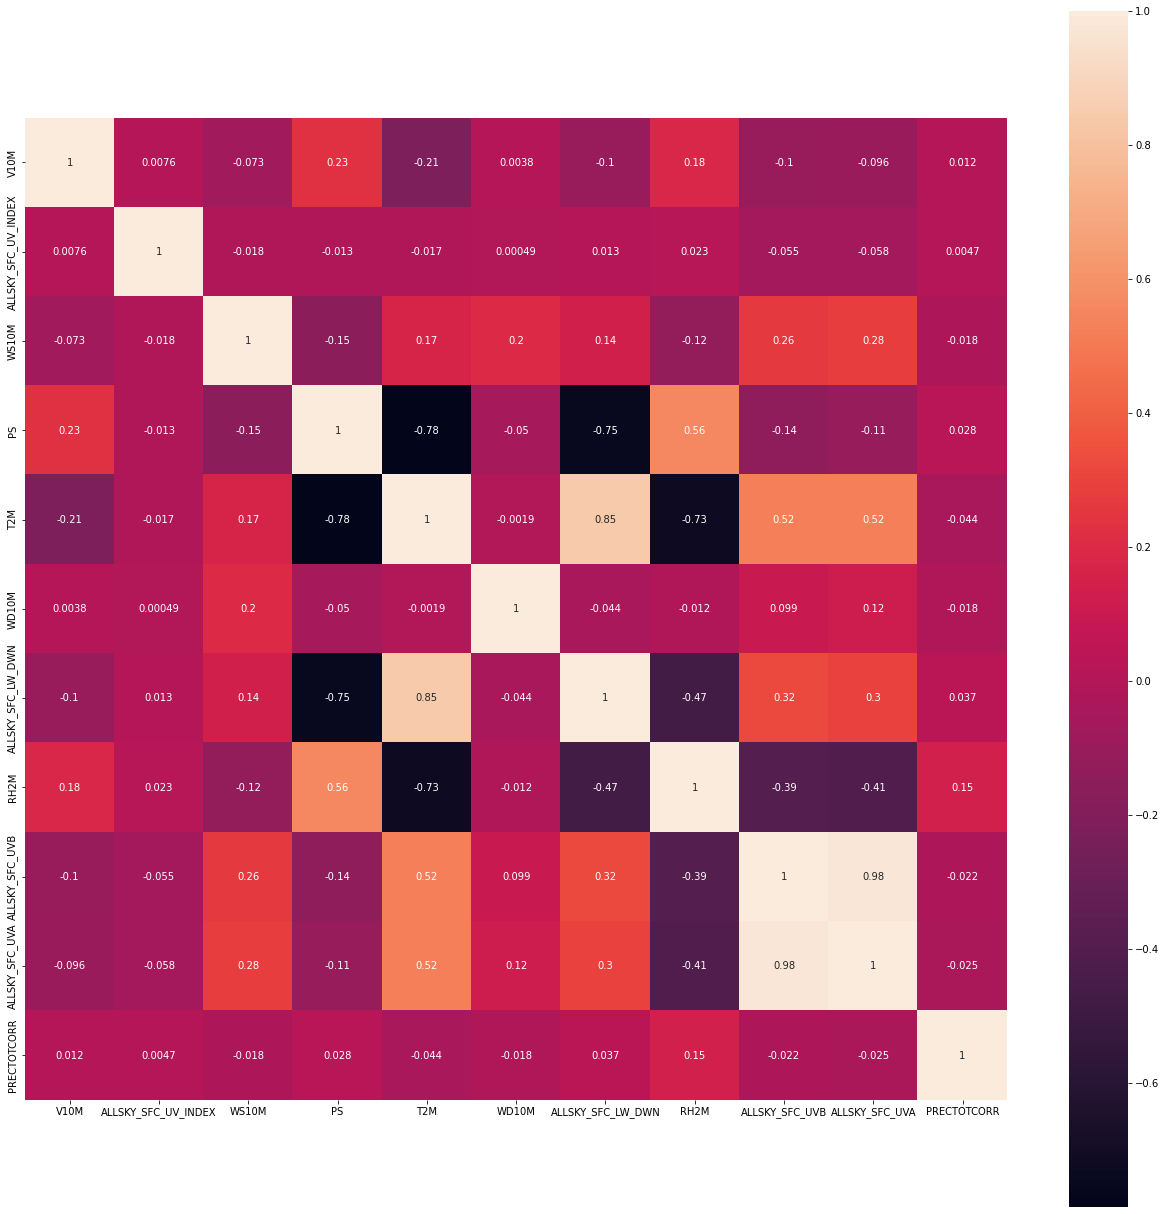

In [63]:
import seaborn as sns
corr = dts.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr, annot=True, square=True);

**OBSERVATIONS**
- Relative Humidity and pressure (PS) are corr (0.56)
- High negative corr between temerature and pressure (-.78)
- Relative humidity and Temperature are -vely correlated (-.73)

